In [63]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [64]:
import torch
from torch.utils.data import DataLoader
from torchvision import transforms
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from preprocess.dataset_img import CustomDatasetH5, FolderImageToDatasetH5
from networks.util import count_parameters, run_batch_convolution_neural_network
from networks.convolutional import ConvolutionalNetworkLayers
import torch.nn as nn
%matplotlib inline

In [65]:
base_path = "../"
pixel_image = 180
number_of_class = 6
number_band_image = 3
batch_size = 10

## Convert the folder to h5

In [66]:
h5 = FolderImageToDatasetH5(base_path=base_path, new_pixel_img=[pixel_image, pixel_image], is_debug = True)
h5.convert_folder_to_dataset(
    root_folder="data_img_test/Entrenamiento",
)
training_file = h5.save_file(file_name="training_img")

h5.convert_folder_to_dataset(
    root_folder="data_img_test/Test",
)
testing_file = h5.save_file(file_name="testing_img")

h5.convert_folder_to_dataset(
    root_folder="data_img_test/Validacion",
)
validating_file = h5.save_file(file_name="validation_img")

Path source /develop/src
Path to get images ../data_img_test/Entrenamiento
 File to save h5 ../dataset_training_img_build.h5
Path to get images ../data_img_test/Test
 File to save h5 ../dataset_testing_img_build.h5
Path to get images ../data_img_test/Validacion
 File to save h5 ../dataset_validation_img_build.h5


In [67]:
transform = transforms.ToTensor()


In [68]:
train_dataset = CustomDatasetH5(
    base_dir=base_path,
    h5_file=training_file,
    transform=transform,
    is_debug=True,
)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = CustomDatasetH5(
    base_dir=base_path,
    h5_file=testing_file,
    transform=transform,
    is_debug=True,
)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

validation_dataset = CustomDatasetH5(
    base_dir=base_path,
    h5_file=validating_file,
    transform=transform,
    is_debug=True,
)
validation_loader_loader = DataLoader(validation_dataset, batch_size=450,  shuffle=True)

/develop/src
../dataset_training_img_build.h5
/develop/src
../dataset_testing_img_build.h5
/develop/src
../dataset_validation_img_build.h5


In [69]:
torch.manual_seed(42)
model = ConvolutionalNetworkLayers(
    number_pixel_image=pixel_image,
    number_of_class=number_of_class,
    drop_out_probability=0.5,
    number_band_image=number_band_image,
    convolution_filter=[10, 5],
    layers=[1024, 512, 256, 128, 64],
)
model

ConvolutionalNetworkLayers(
  (conv1): Conv2d(3, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(10, 5, kernel_size=(3, 3), stride=(1, 1))
  (layers): Sequential(
    (0): Linear(in_features=9245, out_features=1024, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_features=1024, out_features=512, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.5, inplace=False)
    (8): Linear(in_features=512, out_features=256, bias=True)
    (9): ReLU(inplace=True)
    (10): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Dropout(p=0.5, inplace=False)
    (12): Linear(in_features=256, out_features=128, bias=True)
    (13): ReLU(inplace=True)
    (14): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_ru

In [70]:
count_parameters(model)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

   750
    10
   450
     5
9466880
  1024
  1024
  1024
524288
   512
   512
   512
131072
   256
   256
   256
 32768
   128
   128
   128
  8192
    64
    64
    64
   384
     6
______
10170757


In [71]:
elapsed_time, train_losses, test_losses, train_correct, test_correct = run_batch_convolution_neural_network(
    train_loader=train_loader,
    test_loader=test_loader,
    model=model,
    criterion=criterion,
    optimizer=optimizer,
    batch_size=batch_size,
    epochs= 20,
    is_debug=True,
) 

epoch:  0  batch:    5 [    50/1009]  loss: 1.81281984      accuracy:  26.000%
epoch:  0  batch:   10 [   100/1009]  loss: 2.00655127      accuracy:  29.000%
epoch:  0  batch:   15 [   150/1009]  loss: 1.81494212      accuracy:  28.667%
epoch:  0  batch:   20 [   200/1009]  loss: 1.73337293      accuracy:  27.000%
epoch:  0  batch:   25 [   250/1009]  loss: 1.56362581      accuracy:  28.400%
epoch:  0  batch:   30 [   300/1009]  loss: 1.46326768      accuracy:  29.000%
epoch:  0  batch:   35 [   350/1009]  loss: 1.79143012      accuracy:  28.857%
epoch:  0  batch:   40 [   400/1009]  loss: 1.61573946      accuracy:  28.750%
epoch:  0  batch:   45 [   450/1009]  loss: 1.77246308      accuracy:  29.778%
epoch:  0  batch:   50 [   500/1009]  loss: 1.39355326      accuracy:  31.200%
epoch:  0  batch:   55 [   550/1009]  loss: 1.40294337      accuracy:  32.000%
epoch:  0  batch:   60 [   600/1009]  loss: 1.34442449      accuracy:  32.833%
epoch:  0  batch:   65 [   650/1009]  loss: 1.590667

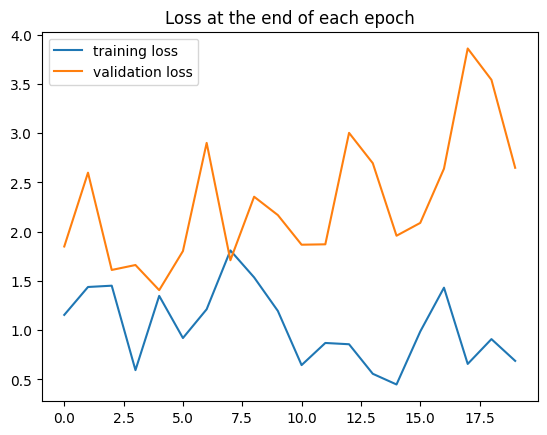

In [72]:
# train_losses
plt.plot(train_losses, label='training loss')
plt.plot(test_losses, label='validation loss')
plt.title('Loss at the end of each epoch')
plt.legend();

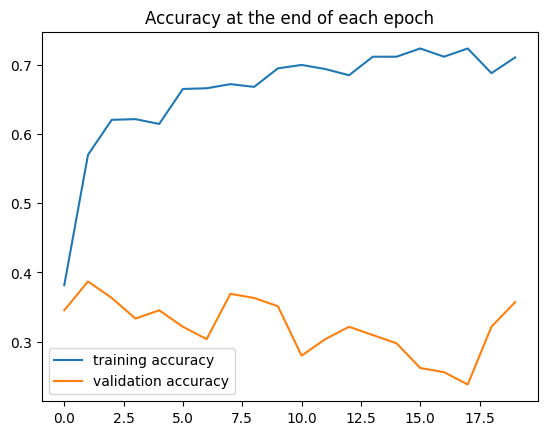

In [73]:
plt.plot([t/1009 for t in train_correct], label='training accuracy')
plt.plot([t/168 for t in test_correct], label='validation accuracy')
plt.title('Accuracy at the end of each epoch')
plt.legend();

## Evaluate Test Data

In [74]:
with torch.no_grad():
    correct = 0
    for X_test, y_test in validation_loader_loader:
        y_val = model(X_test)  # we don't flatten the data this time
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()
print(f'Test accuracy: {correct.item()}/{len(validation_dataset)} = {correct.item()*100/(len(validation_dataset)):7.3f}%')

Test accuracy: 218/450 =  48.444%


In [75]:
# print a row of values for reference
np.set_printoptions(formatter=dict(int=lambda x: f'{x:4}'))
print(np.arange(number_of_class).reshape(1,number_of_class))
print()

# print the confusion matrix
print(confusion_matrix(predicted.view(-1), y_test.view(-1)))

[[   0    1    2    3    4    5]]

[[ 132    0    0    0    0    1]
 [   0    0    0    0    0    0]
 [   0    0    4    3    3    1]
 [   0    6   12   51   45   31]
 [   1    6    6   17    5   36]
 [   1    8    6   30   19   26]]


In [76]:
misses = np.array([])
for i in range(len(predicted.view(-1))):
    if predicted[i] != y_test[i]:
        misses = np.append(misses,i).astype('int64')
        
# Display the number of misses
len(misses)

232